<a href="https://colab.research.google.com/github/Chewye/data_exploration/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Context**

In [554]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

url = 'https://raw.githubusercontent.com/Chewye/data/main/train.csv'
train_data = pd.read_csv(url, index_col = 'PassengerId')
print('Success')

Success


In [555]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


*   Survived - выжившие;
*   Pсlass - класс;
*   Sex - пол;
*   Age - возраст;
*   Sibsp - Братья (сестра)/супруги на борту;
*   Parch - Родители/дети на борту;
*   Fare - плата за проезд;
*   Cabin - номер каюты;
*   Embarked - порт отбытия;

## **Data quality assessment**

In [556]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


*   Выживших 42,7%; 
*   3 Класса;
*   Средний возраст 38, минимальный 0.08, максимальный 87; 
*   Братья/сестры/супруги 0-8 на борту, большая часть - 0;
*   Родители/дети на борту 0-9, большая часть - 0;
*   Плата  за проезд  0.68-744, соредняя - 44;







In [557]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


*   int64 (4) - Survived, Pclass, SibSp, Parch
*   float64(2) - Age, Fare
*   object(5) - Name, Sex, Ticket, Cabin, Embarked


In [558]:
train_data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

В базе отсутствуют значения в столбцах:
*   Age - 3292
*   Ticket - 4623
*   Fare - 134
*   Cabin - 67866
*   Embarked - 250

Очень много пропусков в столбце Cabin, поэтому для анализа эти данные мы использовать не будем.В столбце Age отсутствует 4% данных, округлим возраст до полных лет и заполним отсутствующие данные средним возрастом

In [559]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

Так же поступим и с колонкой Fare

In [560]:
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)


Удалим строки с пустыми значениями Embarked, количество таких строк около 0.25%:


In [561]:

train_data = train_data[train_data['Embarked'].isnull()==False]


Найдем выбросы по колонкам Age и Fare и удалим эти строки:

In [562]:
for c in ['Age', 'Fare']:
    Q1 = np.percentile(train_data[c], 25)
    Q3 = np.percentile(train_data[c], 75)
    IQR = Q3 - Q1
    step_outliers = IQR * 10
    train_data = train_data.drop(train_data[(train_data[c] < Q1 - step_outliers) | (train_data[c] > Q3 + step_outliers)].index, axis = 0)


При коэффициенте 1.5 очень много выбросов, более 17%. Повысим коэффициент до 10, количество выбросов уменьшилось до ~3%

Найдем выбросы по колонкам SibSp и Parch и удалим эти строки:

In [563]:
for c in ['SibSp', 'Parch']:
    Q1 = np.percentile(train_data[c], 25)
    Q3 = np.percentile(train_data[c], 75)
    IQR = Q3 - Q1
    step_outliers = IQR * 2
    train_data = train_data.drop(train_data[(train_data[c] < Q1 - step_outliers) | (train_data[c] > Q3 + step_outliers)].index, axis = 0)

Удалим столбик Cabin, в котором пропусков более 67%:


In [564]:
train_data = train_data.drop(['Cabin'], axis=1)

Проверим наличие дубликатов

In [565]:
train_data[train_data.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


Дубликатов нет.

Создадим два списка с названием стобцов категориальных данных и числовых. С помощью цикла визуализируем категориальные данные:

Survived:
0    54673
1    40477
Name: Survived, dtype: int64  

Sex:
male      53755
female    41395
Name: Sex, dtype: int64  

Pclass:
3    39487
1    28179
2    27484
Name: Pclass, dtype: int64  

SibSp:
0    70998
1    18980
2     3576
3     1596
Name: SibSp, dtype: int64  

Parch:
0    71358
1    12096
2    10752
3      944
Name: Parch, dtype: int64  

Embarked:
S    69123
C    20904
Q     5123
Name: Embarked, dtype: int64  



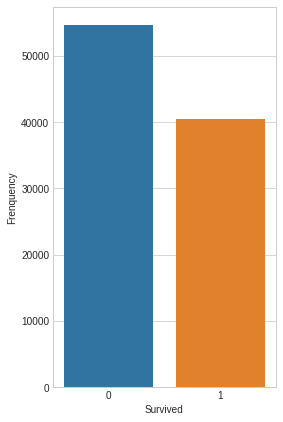

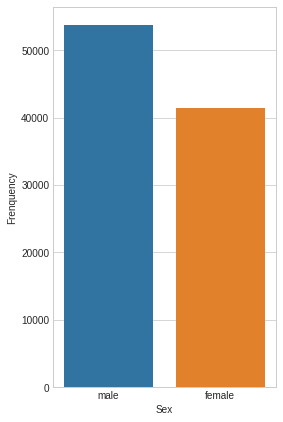

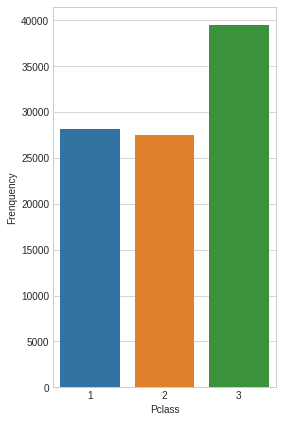

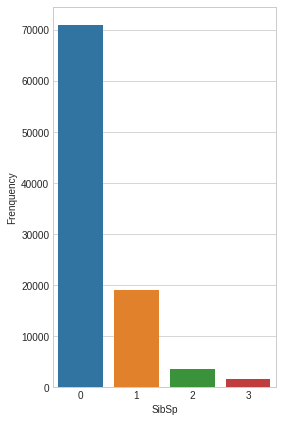

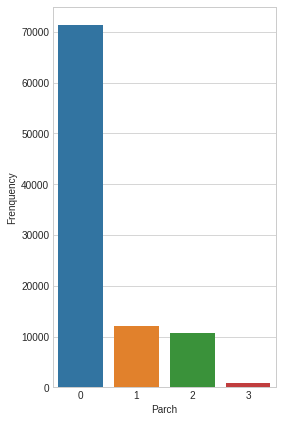

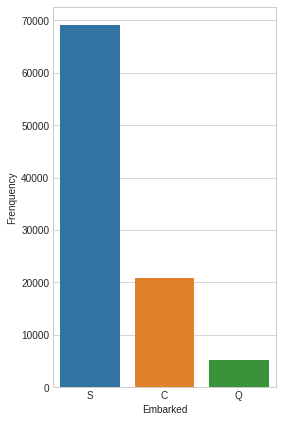

In [566]:
categories_1 = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
categories_2 = ['Age', 'Fare']
for c in categories_1:
    var = train_data[c]    
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (4, 7))
    ax = sns.barplot(x=varValue.index, y= varValue, data=train_data)
    ax.set(xlabel=str(c), ylabel='Frenquency')
    print(f"{c}:\n{varValue}  \n")

Визуализируем числовые данные:

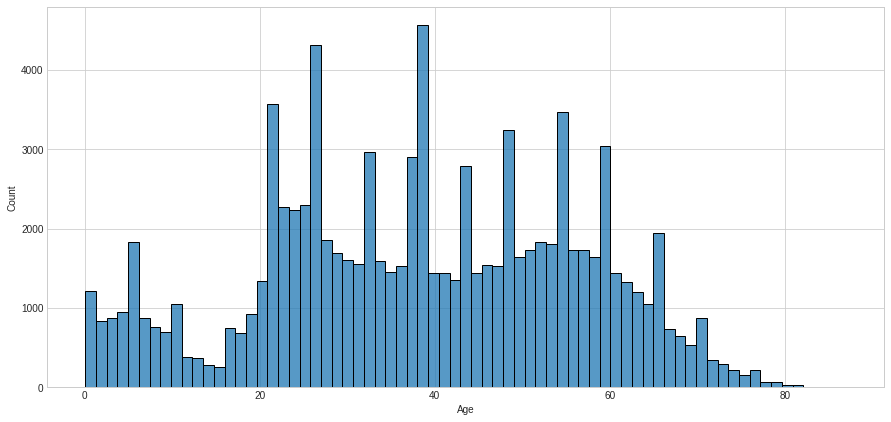

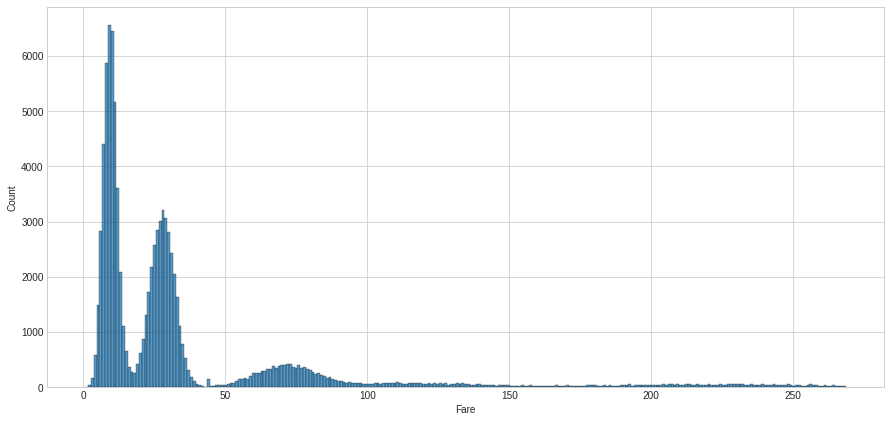

In [567]:
for c in categories_2:
    plt.figure(figsize = (15, 7))
    sns.histplot(train_data[c])


Основная масса пассажиров в возрасте от 20 до 60 лет, самое высокое значение около 39 лет - из-за того, что мы присвоили отсутствующим данным средний возраст

Для наглядности установим пределы по оси Х в гистограмме Fare:


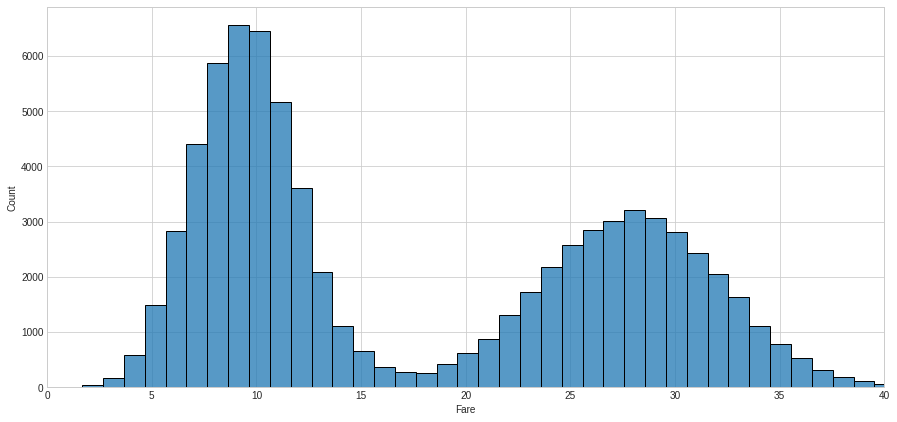

In [568]:
plt.figure(figsize = (15, 7))
plt.xlim(0, 40)
sns.histplot(train_data['Fare'])

Самая популярная стоимость за плавание: 8-10

Заменим в столбце "Sex" "male" на 1, "female" на 0, а в столбце "Embarked" S - 0, C - 1, Q - 2.

In [569]:
train_data = train_data.replace(to_replace=['male', 'female'], value=[1, 0])
train_data = train_data.replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2])

Теперь детасет выглядит так:

In [570]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,38.355472,2,0,209245,27.14,0
1,0,3,"Bryan, Drew",1,38.355472,0,0,27323,13.35,0
2,0,3,"Owens, Kenneth",1,0.330000,1,2,CA 457703,71.29,0
3,0,3,"Kramer, James",1,19.000000,0,0,A. 10866,13.04,0
4,1,3,"Bond, Michael",1,25.000000,0,0,427635,7.76,0


In [571]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,95150.000000,95150.000000,95150.000000,95150.000000,95150.000000,95150.00000,95150.000000,95150.000000
mean,0.425402,2.118844,0.564950,38.385163,0.324961,0.38289,37.255984,0.327378
std,0.494406,0.834886,0.495766,17.986321,0.628627,0.72237,47.943922,0.572615
min,0.000000,1.000000,0.000000,0.080000,0.000000,0.00000,0.680000,0.000000
25%,0.000000,1.000000,0.000000,25.000000,0.000000,0.00000,9.910000,0.000000
50%,0.000000,2.000000,1.000000,38.355472,0.000000,0.00000,23.950000,0.000000
75%,1.000000,3.000000,1.000000,53.000000,1.000000,1.00000,32.730000,1.000000
max,1.000000,3.000000,1.000000,87.000000,3.000000,3.00000,268.650000,2.000000


## **Data exploration**

Построим столбчатые диаграммы: зависимость категориальных данных на выживаемость

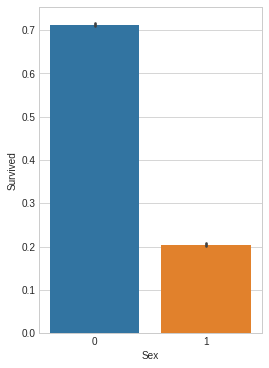

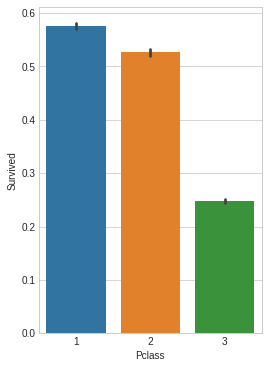

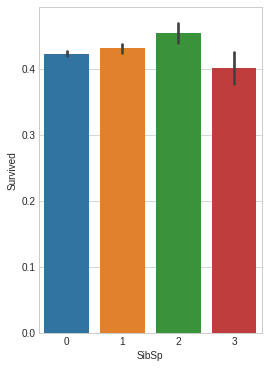

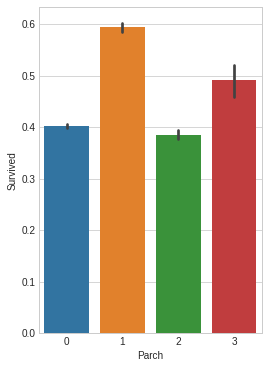

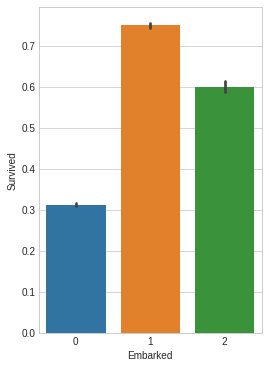

In [572]:
for c in categories_1[1:]:
   plt.figure(figsize = (4, 6))
   # visualize
   sns.barplot(train_data[c], train_data['Survived']) 

Количество выживших:
*   мужчин около 20%, женщин - более 70%
*   В первом классе выживают чаще чем в других, в третьем реже всего
*   По количеству братьев/сестер/супругов после удаления выбросов корреляция не прослеживается
*   По количеству детей/родителей на борту больше всего выжившых при наличии 1 родственника
*   Худшая выживаемость у отбывшых с порта "Southampton", лучшая - "Cherbourg"

Построим гистограмму, которая покажет зависимость выживаемости от возраста:

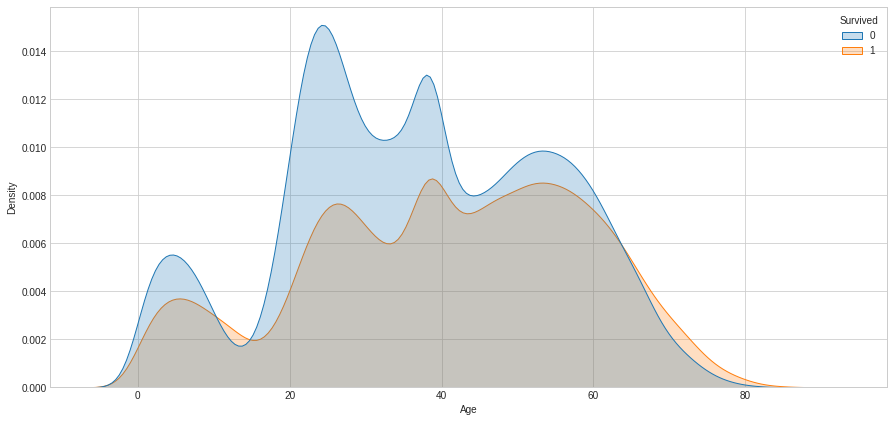

In [573]:
plt.figure(figsize = (15, 7))
sns.kdeplot(x='Age', shade=True, hue='Survived', data=train_data)

Изменим масштаб по оси Х чтобы подробней рассмотреть наибольшую разницу между погибшими и выжившими:

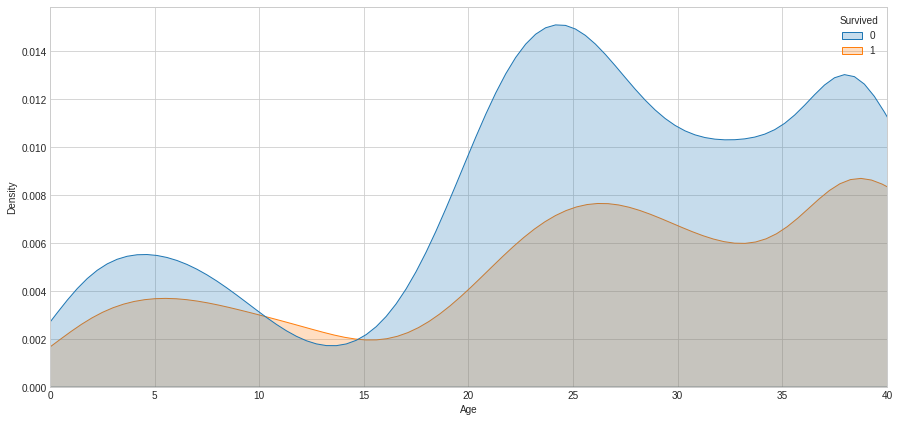

In [574]:
plt.figure(figsize = (15, 7))
plt.xlim(0, 40)
sns.kdeplot(x='Age', shade=True, hue='Survived', data=train_data)

*   Наихудшая выживаемость у молодых людей возраста 23-25 лет.
*   Хороший процент выжившых (более 50%) у подростков 12-14 лет
*   С 18 до 40 наблюдается низкий процент выживших, после 40 процент выживших начинает рости
*   После 62 выживших более 50%



Построим тепловую карту для визуализации корреляций:

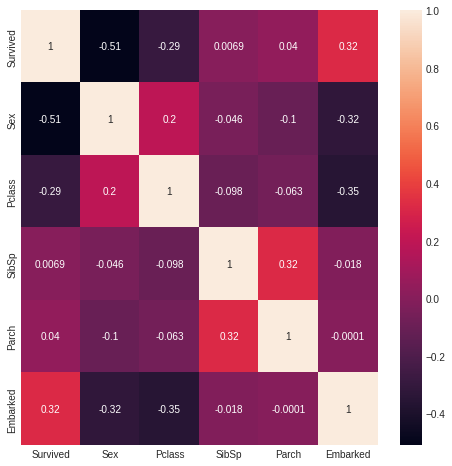

In [575]:
plt.figure(figsize = (8, 8))
sns.heatmap(train_data[categories_1].corr(), annot=True)

Создаем функцию для визуализации данных, будем выводить гистограммы, корреляция которых более 0.2

In [576]:
def corr(var_x, var_y, sign=None):
  plt.figure(figsize = (4, 6))
  #visualize
  sns.barplot(var_x, var_y, sign, data=train_data) 


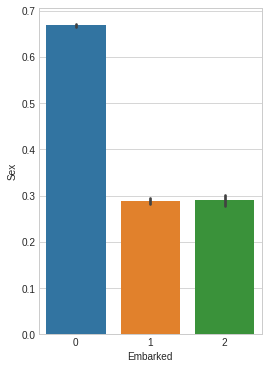

In [577]:
corr('Embarked', 'Sex')

Пассажиры выбывшиие из порта Southampton, которые как мы выяснили ранее имели худшую выживаемость ~ 30%, на ~67% являются мужчинами, в остальных портах преобладают женщины ~70%

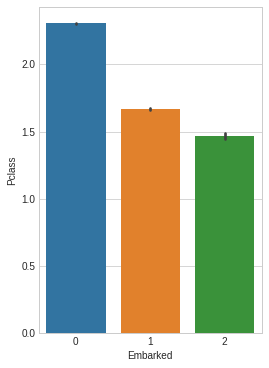

In [578]:
corr('Embarked', 'Pclass')

Помимо того, что в порту Embarked преобладали мужчины, что как мы выяснили ранее является отрицательным фактором для выживания, также ситуацию усугубило и то, что в этом порту пассажиры приемущественно имели 3 класс

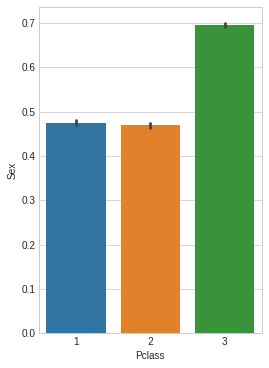

In [579]:
corr('Pclass', 'Sex')

В третьем классе приемущественно мужчины ~ 70%, во втором и первом классе небольшое преобладание женщин

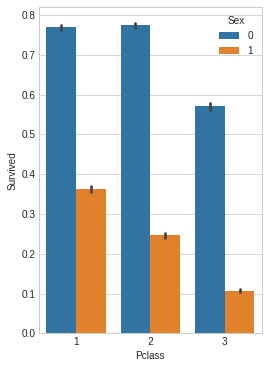

In [580]:
corr('Pclass', 'Survived', 'Sex')

Выживаемость женщин прямопропорционально зависит от класса, у мужчин в 1 и 2 классе выживаемость практически одинакова, в третьем значительно ниже.

Cоздадим функцию для визуализации данных во возрасту

In [581]:
def age(x):
  plt.figure(figsize = (15, 7))
  sns.kdeplot(x='Age', shade=False, data=train_data)
  sns.kdeplot(x='Age', shade=True, hue=x, data=train_data)

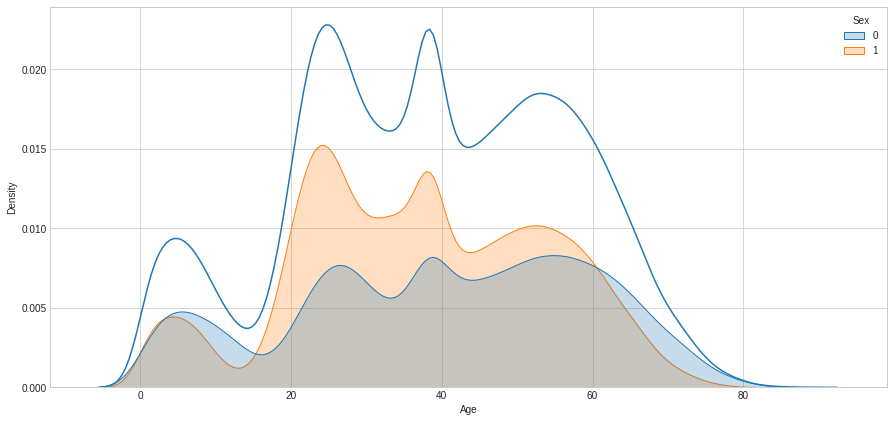

In [582]:
age('Sex')

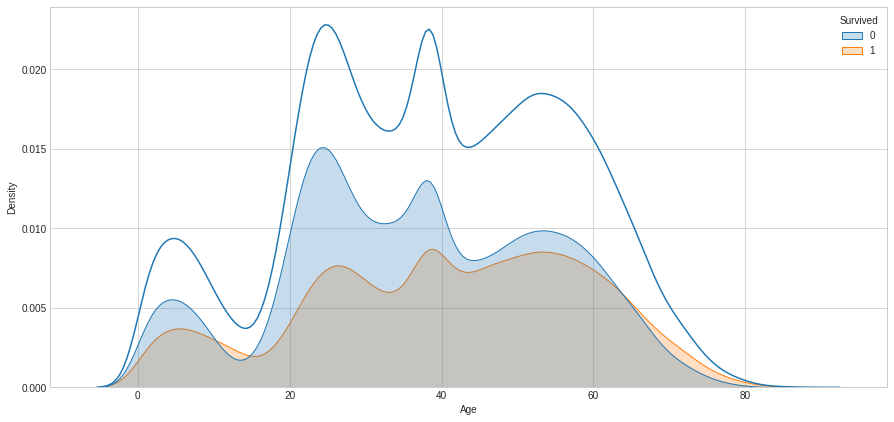

In [583]:
age('Survived')

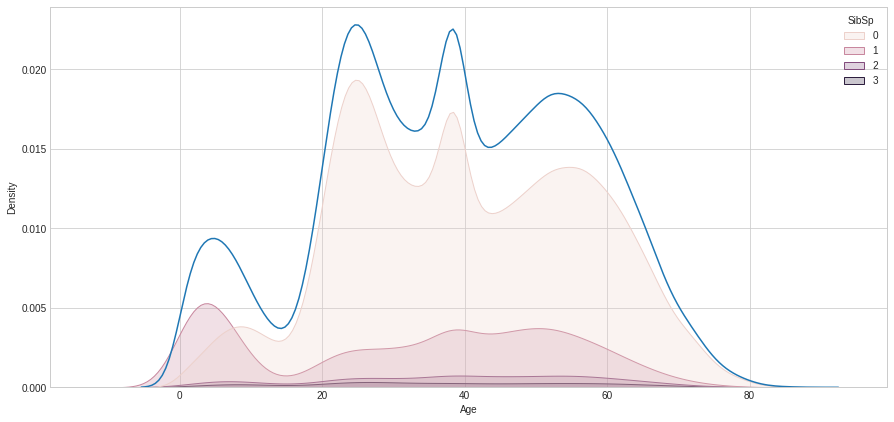

In [584]:
age('SibSp')

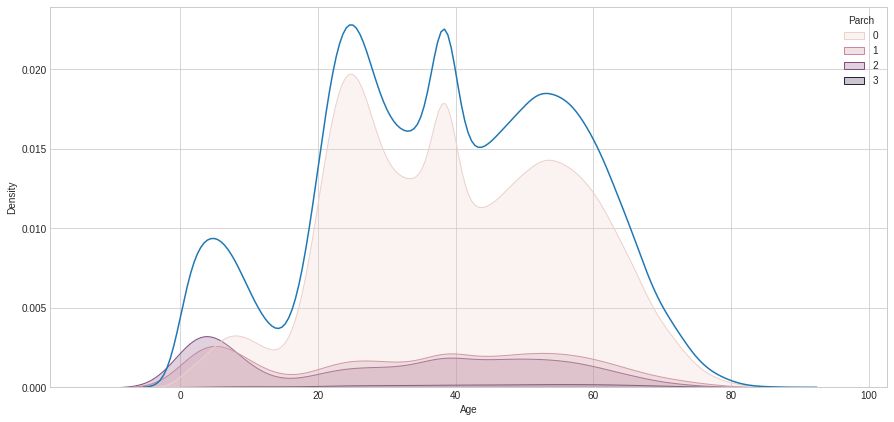

In [585]:
age('Parch')

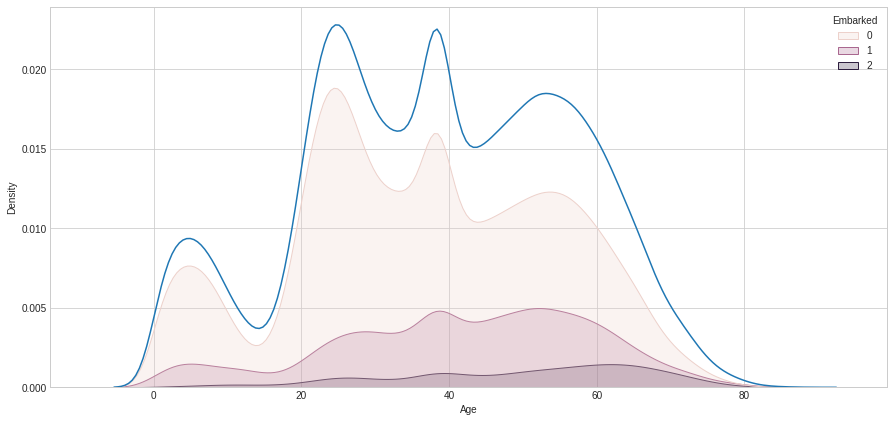

In [586]:
age('Embarked')

Порт Southampton задает тренд гистограммы из-за абсолютного большинства пассажиров. В порту Cherbourg пассажиры приемущественно имеют возраст от 25 до 60 лет. А в самом малочисленном порту по отбытию пассажиров Queenstown пассажиры более возрастные, детей практически нет, преобладают пассажиры возрастом 60 - 70 лет, также в этом порту наибольший процент выживших

Рассмотрим гистограмму более подробно по возрастным пассажирам


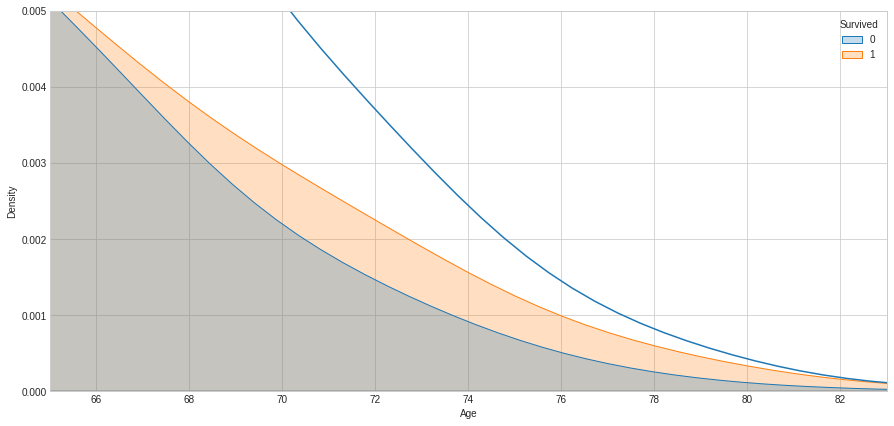

In [587]:
plt.figure(figsize = (15, 7))
plt.xlim(65, 83)
plt.ylim(0, 0.005)
sns.kdeplot(x='Age', shade=False, data=train_data)
sns.kdeplot(x='Age', shade=True, hue='Survived', data=train_data)

In [588]:
train_data[train_data.Age > 78].value_counts('Survived')

Survived
1    114
0     27
dtype: int64

Удивительно, но у пассажиров чей возраст выше 78 колосальная выживаемость! 114 против 27.

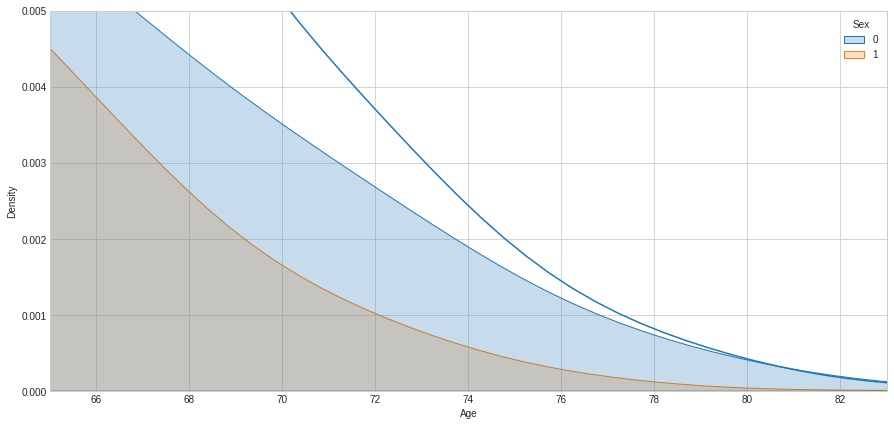

In [589]:
plt.figure(figsize = (15, 7))
plt.xlim(65, 83)
plt.ylim(0, 0.005)
sns.kdeplot(x='Age', shade=False, data=train_data)
sns.kdeplot(x='Age', shade=True, hue='Sex', data=train_data)

In [590]:
train_data[train_data.Age > 70].value_counts('Sex')

Sex
0    1461
1     412
dtype: int64

Среди пассажиров старше 70 лет преобладают женщины, их больше в 3 раза. После 80 лет количество женщин стремится к 100%

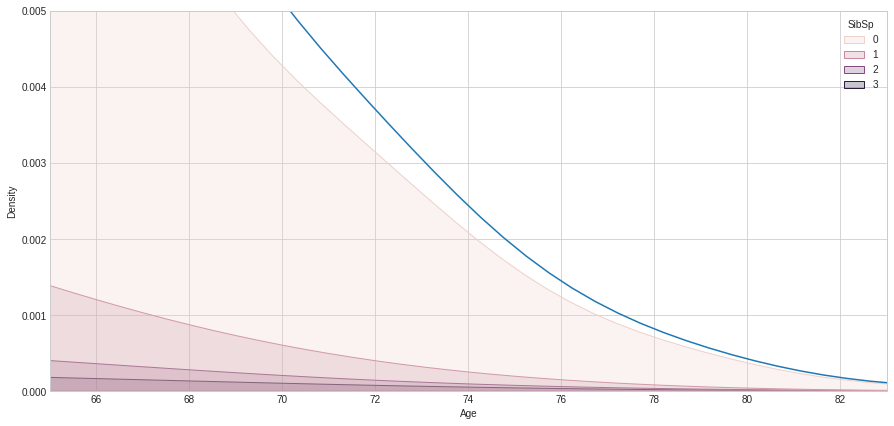

In [591]:
plt.figure(figsize = (15, 7))
plt.xlim(65, 83)
plt.ylim(0, 0.005)
sns.kdeplot(x='Age', shade=False, data=train_data)
sns.kdeplot(x='Age', shade=True, hue='SibSp', data=train_data)

In [592]:
train_data[train_data.Age > 70].value_counts('SibSp')

SibSp
0    1614
1     164
2      60
3      35
dtype: int64

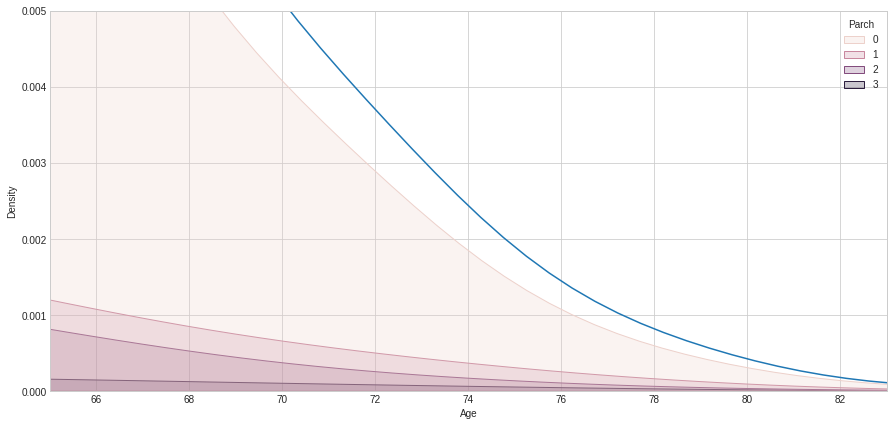

In [593]:
plt.figure(figsize = (15, 7))
plt.xlim(65, 83)
plt.ylim(0, 0.005)
sns.kdeplot(x='Age', shade=False, data=train_data)
sns.kdeplot(x='Age', shade=True, hue='Parch', data=train_data)

In [594]:
train_data[train_data.Age > 70].value_counts('Parch')

Parch
0    1435
1     274
2     115
3      49
dtype: int64

Посмотрим как стоимость влияет на выживаемость

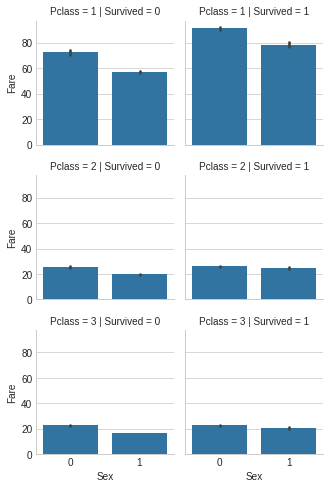

In [595]:
g = sns.FacetGrid(train_data, row = "Pclass", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Чем выше стоимость тем выше выживаемость, особенно у мужчин. Так же средняя стоимость в 1 классе выше всех, в третьем - ниже.

## **Summary**

Чтобы иметь максимальный шанс на выживание нужно:
*   Быть женщиной
*   Возраст ближе к 80
*   Быть в первом классе
*   Заплатить побольше


Спасибо за внимание!

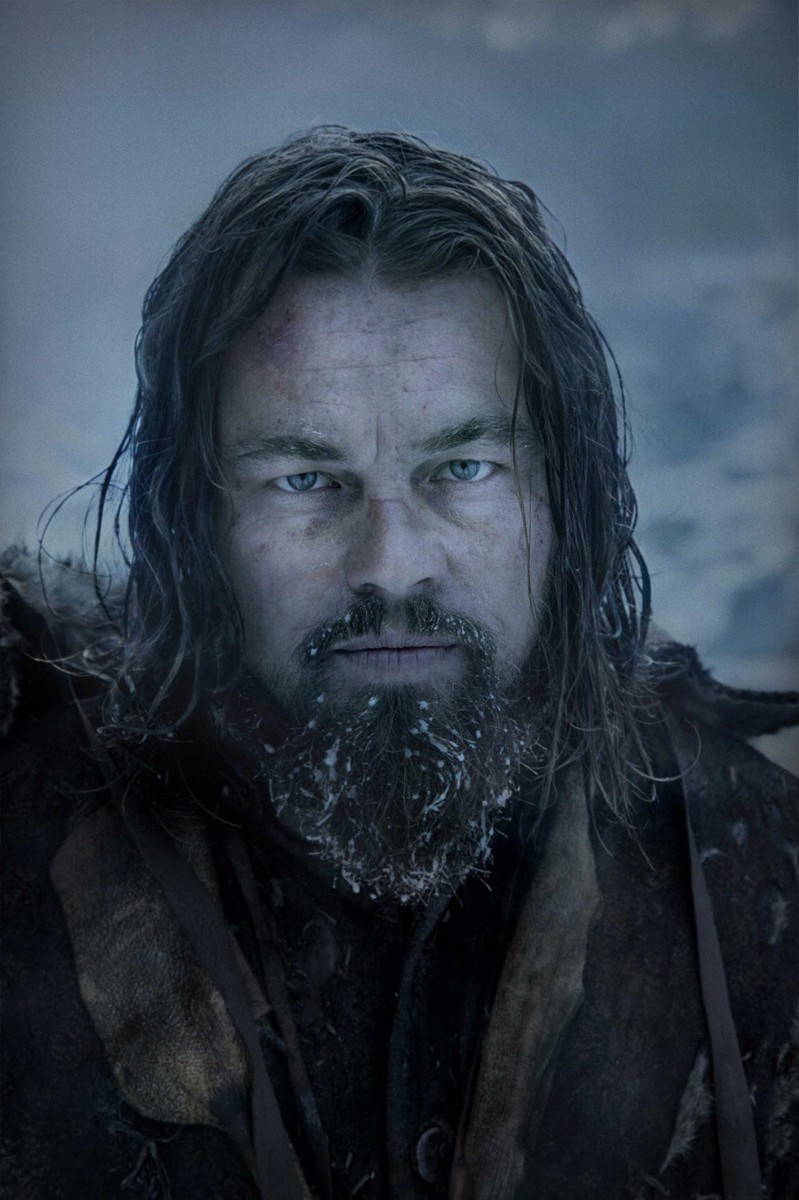